**Dawn Betzel**

**Capstone 2**

# Brain Tumor Classification Using Resnet
### About
A brain tumor is a mass or growth of abnormal cells in your brain. Many different types of brain tumors exist. Some brain tumors are noncancerous (benign), and some brain tumors are cancerous (malignant).

Primary brain tumors originate in the brain itself or in tissues close to it, such as in the brain-covering membranes (meninges), cranial nerves, pituitary gland or pineal gland.

Primary brain tumors begin when normal cells develop changes (mutations) in their DNA. A cell's DNA contains the instructions that tell a cell what to do. The mutations tell the cells to grow and divide rapidly and to continue living when healthy cells would die. The result is a mass of abnormal cells, which forms a tumor.

In adults, primary brain tumors are much less common than are secondary brain tumors, in which cancer begins elsewhere and spreads to the brain.

### Diagnosis
Symptoms of brain tumors vary according to the type of tumor and the location. Because different areas of the brain control different functions of the body, where the tumor lies affects the symptoms you get.

Some tumors have no symptoms until they’re large and then cause a serious, rapid decline in health. Other tumors may have symptoms that develop slowly.

Accurate diagnosis should be done for detecting brain tumor to start proper treatment early, so as to improve the life expectancy of the patient. Best technique to diagnose for brain tumor is Magnetic Resource Imaging (MRI).

# Types of Brain tumor
#### Glioma is a type of tumor that occurs in the brain and spinal cord.
#### Pituitary is a tumor that forms in the pituitary gland near the brain that can cause changes in hormone levels in the body.
#### Meningioma is a tumor that forms on membranes that cover the brain and spinal cord just inside the skull.

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import random
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
import h5py
import keras
from keras.layers import *
from keras.callbacks import *
from keras import backend as K
from keras.models import Model
from keras.applications import *
from tensorflow.keras.optimizers import Adam
from keras.applications.resnet import preprocess_input

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
tumor = [('glioma_tumor', 0),('meningioma_tumor', 1),('no_tumor', 2),('pituitary_tumor', 3)]
root = '/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master'
path1 = root + '/Training/'
path2 = root + '/Testing/'
print(path1)
print(path2)

/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Training/
/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Testing/


In [28]:
os.listdir(path1)

['pituitary_tumor', 'no_tumor', 'meningioma_tumor', 'glioma_tumor']

In [29]:
train_dir = path1
test_dir = path2
glioma = path1 + "glioma_tumor"
meningioma = path1 + "meningioma_tumor"
no_tumor = path1 + "no_tumor"
pituitary = path1 + "pituitary_tumor"
print(meningioma)

/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Training/meningioma_tumor


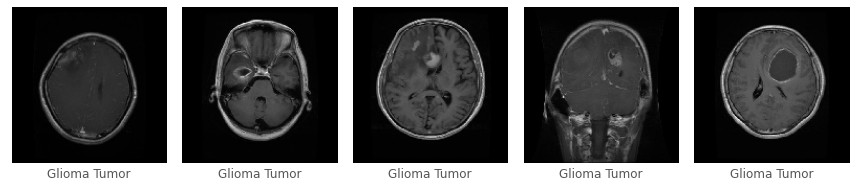

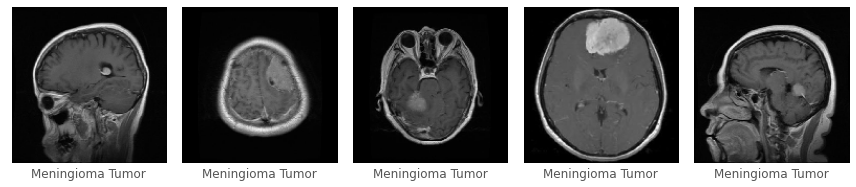

In [30]:
#Visualization of Glioma and Meningioma Tumour

plt.figure(figsize=(12,6))
gli_samp = random.sample(os.listdir(glioma),5)

for i,image in enumerate(gli_samp):
    path = os.path.join(glioma,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Glioma Tumor")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();

plt.figure(figsize=(12,6))
menin_samp = random.sample(os.listdir(meningioma),5)

for i,image in enumerate(menin_samp):
    path = os.path.join(meningioma,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Meningioma Tumor")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();

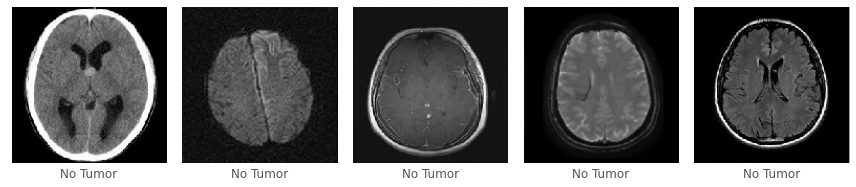

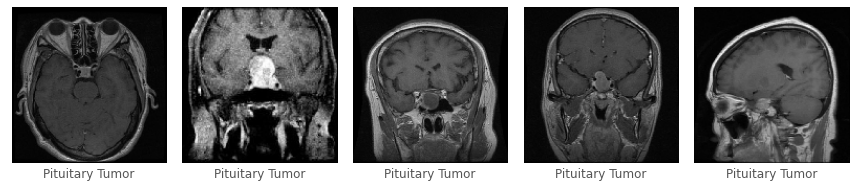

In [31]:
#Visualization of No Tumor and Pituitary Tumour

plt.figure(figsize=(12,6))
no_samp = random.sample(os.listdir(no_tumor),5)

for i,image in enumerate(no_samp):
    path = os.path.join(no_tumor,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("No Tumor")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();

plt.figure(figsize=(12,6))
pit_samp = random.sample(os.listdir(pituitary),5)

for i,image in enumerate(pit_samp):
    path = os.path.join(pituitary,image)
    img = load_img(path,target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Pituitary Tumor")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout();

In [32]:
#Feeding Training Data to X_train and y_train

train_dir = path1
test_dir = path2
train_glioma = glioma
train_meningioma = meningioma
train_no_tumour = no_tumor
train_pituitary = pituitary

X_train = []
y_train = []

for i in tqdm(os.listdir(train_glioma)):
    path = os.path.join(train_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Glioma')
    
for i in tqdm(os.listdir(train_meningioma)):
    path = os.path.join(train_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Meningioma')
    
for i in tqdm(os.listdir(train_no_tumour)):
    path = os.path.join(train_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('No_Tumour')   
    
for i in tqdm(os.listdir(train_pituitary)):
    path = os.path.join(train_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append('Pituitary')    

100%|██████████| 827/827 [00:06<00:00, 122.60it/s]


In [33]:
#Feeding Testing Data to X_train and y_train
test_glioma = path2 + "glioma_tumor"
test_meningioma = path2 + "meningioma_tumor"
test_no_tumour = path2 + "no_tumor"
test_pituitary = path2 + "pituitary_tumor"

X_test = []
y_test = []

for i in tqdm(os.listdir(test_glioma)):
    path = os.path.join(test_glioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Glioma')
    
for i in tqdm(os.listdir(test_meningioma)):
    path = os.path.join(test_meningioma,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Meningioma')
    

for i in tqdm(os.listdir(test_no_tumour)):
    path = os.path.join(test_no_tumour,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('No_Tumour') 
    
for i in tqdm(os.listdir(test_pituitary)):
    path = os.path.join(test_pituitary,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append('Pituitary')    

100%|██████████| 74/74 [00:00<00:00, 94.84it/s]


 #  **Converting to array form**

In [34]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape,y_train.shape

((2870, 224, 224, 3), (2870,))

In [35]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape,y_test.shape

((394, 224, 224, 3), (394,))

#  **Visualizing y_train and y_test count** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


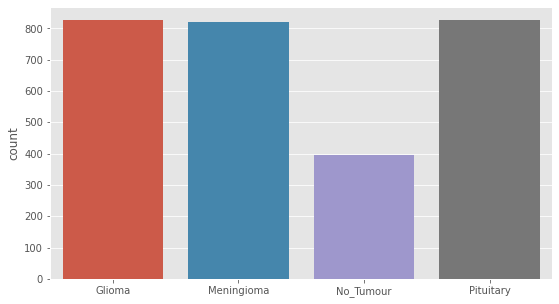

In [36]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y_train)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


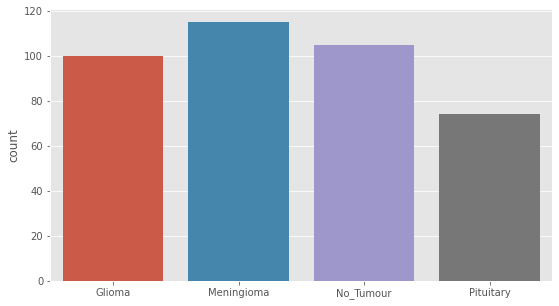

In [37]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y_test)
plt.show()

# **Applying Label Encoding**

In [38]:
y_train

array(['Glioma', 'Glioma', 'Glioma', ..., 'Pituitary', 'Pituitary',
       'Pituitary'], dtype='<U10')

In [40]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y_train = LE.fit_transform(y_train)

In [41]:
y_train

array([0, 0, 0, ..., 3, 3, 3])

In [42]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)

# **Getting Unique Counts**

In [43]:
unique,counts = np.unique(y_train,return_counts=True)
print(unique,counts)

[0 1 2 3] [826 822 395 827]


In [44]:
unique1,counts1 = np.unique(y_test,return_counts=True)
print(unique1,counts1)

[0 1 2 3] [100 115 105  74]


# **Changing target to Category**

In [45]:
y_train = to_categorical(y_train)#num_classes = 4
y_train.shape

(2870, 4)

In [46]:
y_test = to_categorical(y_test)#num_classes = 4
y_test.shape

(394, 4)

In [47]:
img_size=224
train_datagen = ImageDataGenerator(rotation_range=30,height_shift_range=0.2,
                                  zoom_range = 0.3,horizontal_flip=True)#rescale=(1./255),
test_datagen = ImageDataGenerator()#rescale=(1./255)

train_gen = train_datagen.flow_from_directory(directory = train_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)
test_gen = test_datagen.flow_from_directory(directory = test_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


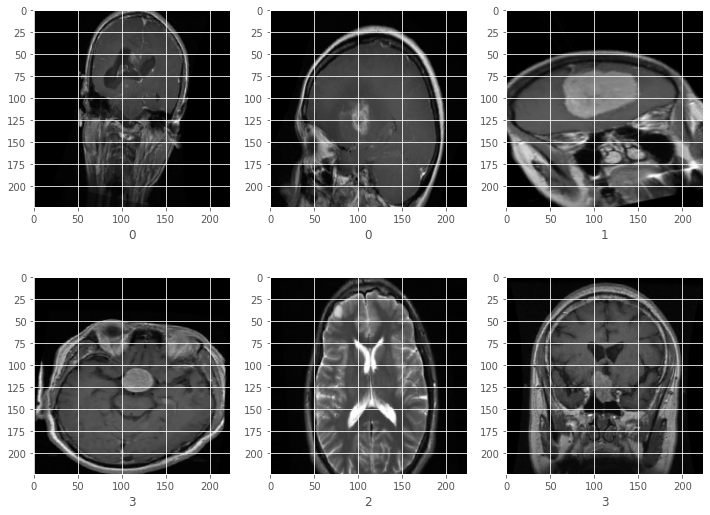

In [48]:
from tensorflow.keras.preprocessing import image
sample_x,sample_y = next(train_gen)
plt.figure(figsize=(12,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    sample = image.array_to_img(sample_x[i])
    plt.xlabel(np.argmax(sample_y[i]))
    plt.imshow(sample)
plt.show()

# **Modelling**

In [49]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [50]:
##Define Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet import preprocess_input
from keras.models import Model
import keras

def load_model(last=True):
  K.clear_session()

  #loading Resnet50 model
  # load the ResNet-50 network, ensuring the head FC layer sets are left off
  baseModel = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
  #mod=ResNet50(include_top=True, weights='imagenet')
  baseModel.trainable = True
  # construct the head of the model that will be placed on top of the base model
  inputs = tf.keras.Input(shape=(224, 224, 3))
  headModel = preprocess_input(inputs)
  headModel = baseModel(headModel, training=False)

  headModel = GlobalAveragePooling2D()(headModel)
  headModel = Dense(512, activation="relu")(headModel)
  headModel = Dropout(rate=0.3)(headModel)
  headModel = Dense(512, activation="relu")(headModel)
  headModel = Dropout(rate=0.3)(headModel)
  outputs = Dense(4, activation="softmax")(headModel)

  # place the head FC model on top of the base model (this will become
  # the actual model we will train)
  model = Model(inputs, outputs)

  return model
model=load_model(last=False)
model.summary()

94781440/94765736 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 224, 224, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
______________________________________________________________

In [51]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [52]:
history = model.fit(X_train,y_train,epochs=15,validation_data = (X_test,y_test),verbose=1, callbacks=[checkpoint,reduce_lr])

Epoch 1/15
90/90 [==============================] - 106s 734ms/step - loss: 0.6882 - accuracy: 0.7174 - val_loss: 1.4322 - val_accuracy: 0.7030

Epoch 00001: val_accuracy improved from -inf to 0.70305, saving model to effnet.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
90/90 [==============================] - 63s 705ms/step - loss: 0.3098 - accuracy: 0.8948 - val_loss: 1.2346 - val_accuracy: 0.6827

Epoch 00002: val_accuracy did not improve from 0.70305
Epoch 3/15
90/90 [==============================] - 63s 704ms/step - loss: 0.2175 - accuracy: 0.9220 - val_loss: 1.4081 - val_accuracy: 0.7792

Epoch 00003: val_accuracy improved from 0.70305 to 0.77919, saving model to effnet.h5
Epoch 4/15
90/90 [==============================] - 63s 705ms/step - loss: 0.1163 - accuracy: 0.9589 - val_loss: 1.7853 - val_accuracy: 0.7538

Epoch 00004: val_accuracy did not improve from 0.77919
Epoch 5/15
90/90 [==============================] - 63s 705ms/step - loss: 0.0745 - accuracy: 0.9760 - val_loss: 2.1809 - val_accuracy: 0.7411

Epoch 00005: val_accuracy did not improve from 0.77919

Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 6/15
90/90 [==============================] - 63s 705ms/step - loss: 0.0277 - accurac

In [53]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

13/13 [==============================] - 3s 200ms/step - loss: 2.8846 - accuracy: 0.8223
Validation Loss: 2.884584903717041
Validation Accuracy: 0.8223350048065186


# **Evaluation**

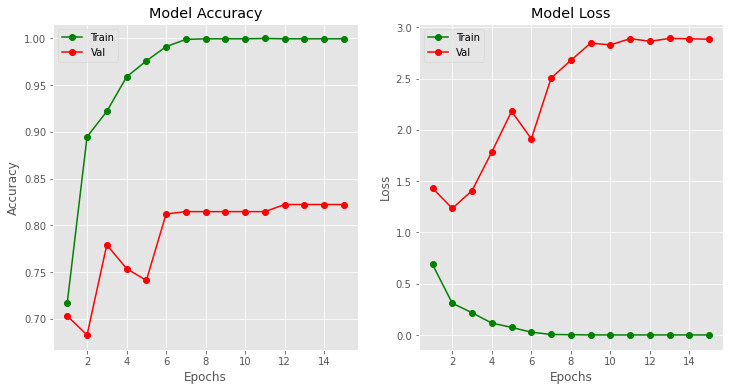

In [54]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

In [55]:
y_pred= model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

array([1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1])

In [56]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [ 37 166 123  68]


In [57]:
y_test_new = np.argmax(y_test,axis=1)

# **Classification Report**

In [61]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print('Accuracy : ' + str(accuracy_score(y_test_new, y_pred)))
clf_report = classification_report(y_test_new,y_pred, target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])
print(clf_report)

Accuracy : 0.8223350253807107
                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.37      0.54       100
meningioma_tumor       0.69      1.00      0.82       115
        no_tumor       0.85      1.00      0.92       105
 pituitary_tumor       0.99      0.91      0.94        74

        accuracy                           0.82       394
       macro avg       0.88      0.82      0.81       394
    weighted avg       0.87      0.82      0.80       394



# **Confusion Matrix**

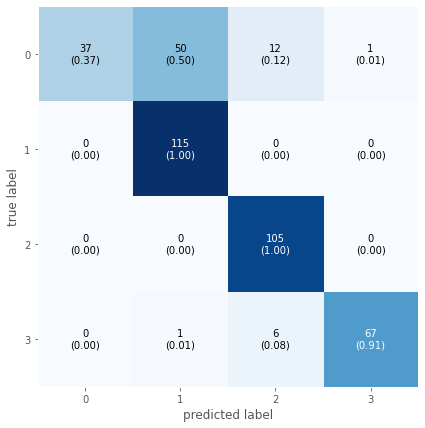

In [59]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test_new,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),
                      show_normed=True);

# **Model Testing**

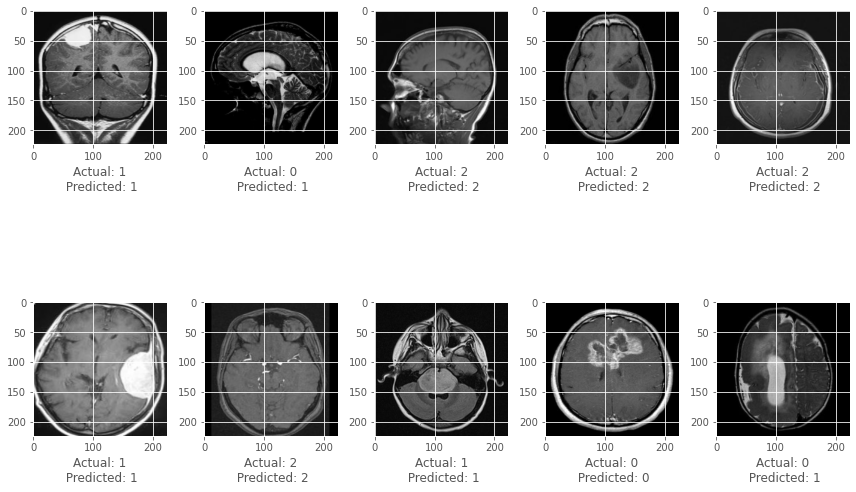

In [60]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = random.choice(range(len(X_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[sample_idx])
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()